# Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
# Loading and view the dataset
"""
Loading the 'mpg' dataset from seaborn.
This dataset contains information about various car models, including their miles per gallon (mpg) ratings
Uncomment the commented lines to load your own dataset.
Make sure to replace <path_to_your_data> with the actual path to your CSV file
"""

df = sns.load_dataset("mpg")

# <--- Loading your own dataset --->
# PATH = "<path_to_your_data>.csv"
# df = pd.read_csv(PATH)

df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


# Exploratory Data Analysis (EDA)

### Inspecting the Data

In [3]:
# General inspection of the dataset

"""
At this stage, we are only interested in the general properties of the dataset.
1. inspecting & validating the data types of each column
2. checking for missing values (cardinality)
3. inspecting missing values (sparsity)
"""

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [4]:
# Transforming data types

"""
In case we identified that certain columns have incorrect data types,
we can transform them to the appropriate types.
In this example, we will convert the 'origin' and 'name' columns to string,
"""

df["origin"] = df["origin"].astype("string")
df["name"] = df["name"].astype("string")


In [5]:
# Inspecting the dataset again after transformation 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    string 
 8   name          398 non-null    string 
dtypes: float64(4), int64(3), string(2)
memory usage: 28.1 KB


In [6]:
# Analyzing the cardinality of the dataset
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

In [7]:
# Analyzing the missing values in the dataset
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

### Univariate Analysis

In [8]:
# Analyzing data distribution
"""
In this section, we will analyze the distribution of the dataset.
In univariate analysis, we inspect the distribution of each column individually and independently.
We are not yet interested in the relationships between columns.
What we aim to undersand are:
1. The distribution (spread) of each column
2. The presence of outliers
3. The presence of skewness in the data
"""
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


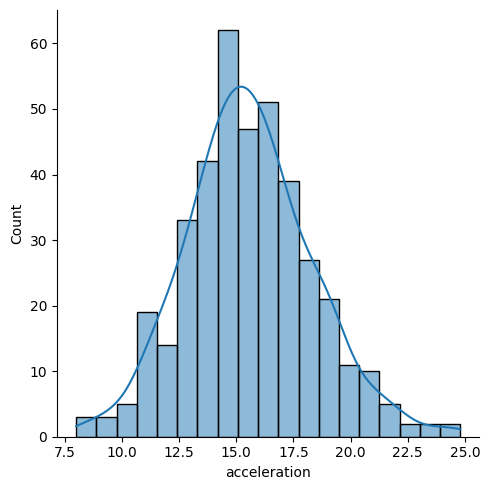

In [9]:
# Visualizing the data distribution
sns.displot(df, x="acceleration", kde=True)

<Axes: xlabel='displacement', ylabel='Count'>

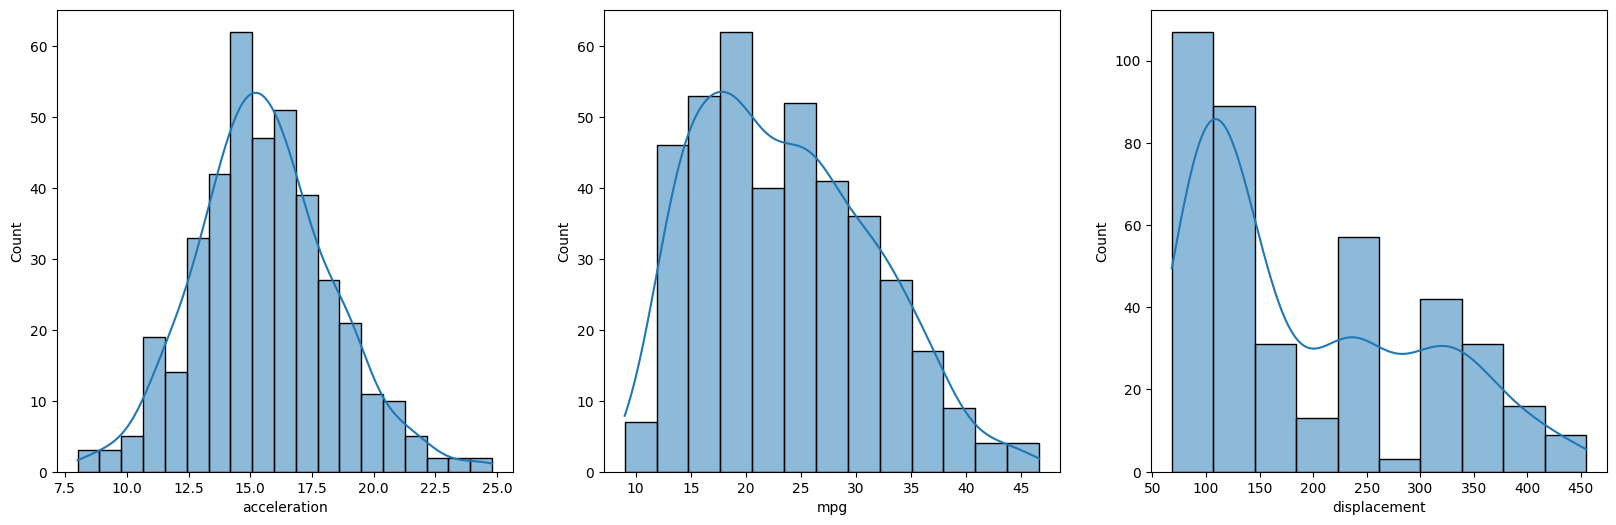

In [10]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
sns.histplot(df, x="acceleration", kde=True)

plt.subplot(1, 3, 2)
sns.histplot(df, x="mpg", kde=True)

plt.subplot(1, 3, 3)
sns.histplot(df, x="displacement", kde=True)

<Axes: xlabel='displacement', ylabel='Count'>

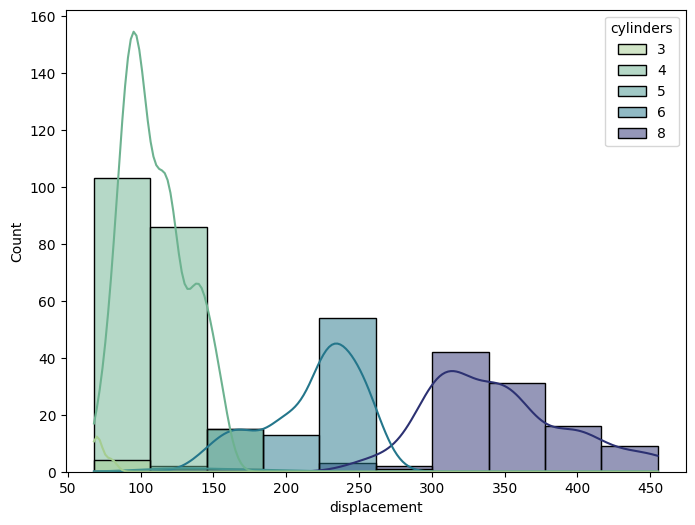

In [11]:
# Deep dive into the distribution plot
plt.figure(figsize=(8, 6))
sns.histplot(df, x="displacement", kde=True, hue="cylinders", palette="crest")

<Axes: xlabel='mpg'>

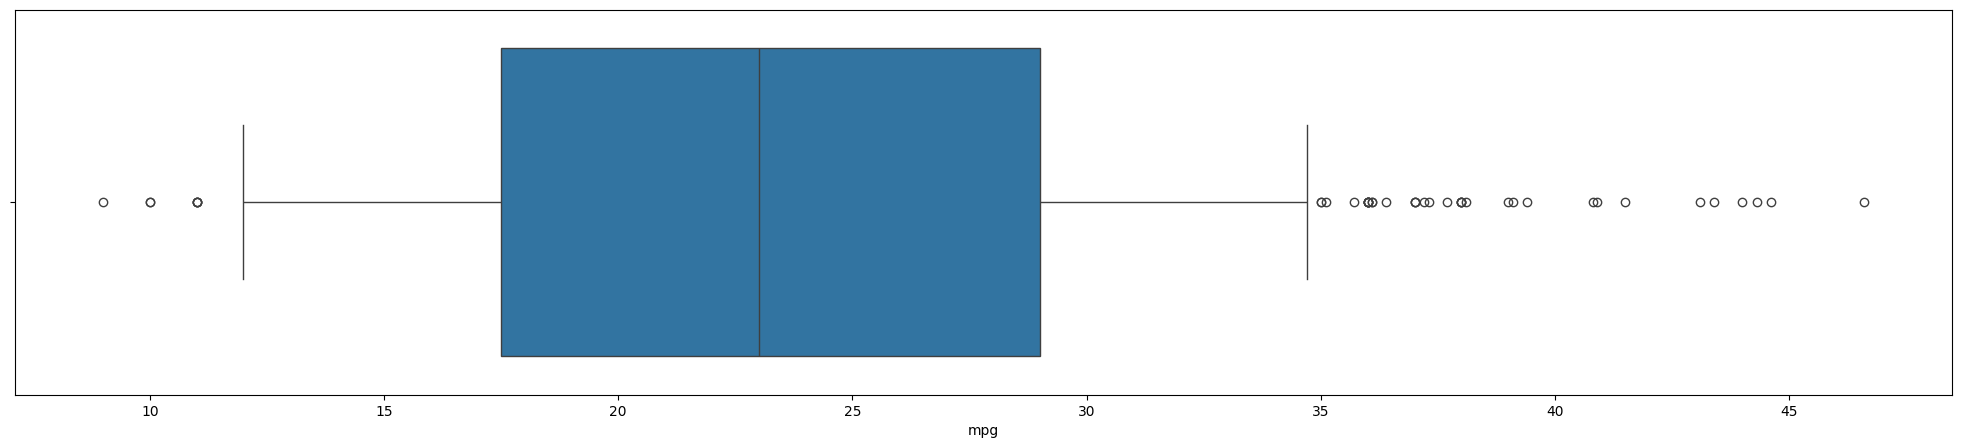

In [12]:
# Using boxplot to visualize the distribution and outliers
plt.figure(figsize=(25, 5))
sns.boxplot(x="mpg", data=df, width=0.8, whis=0.5)

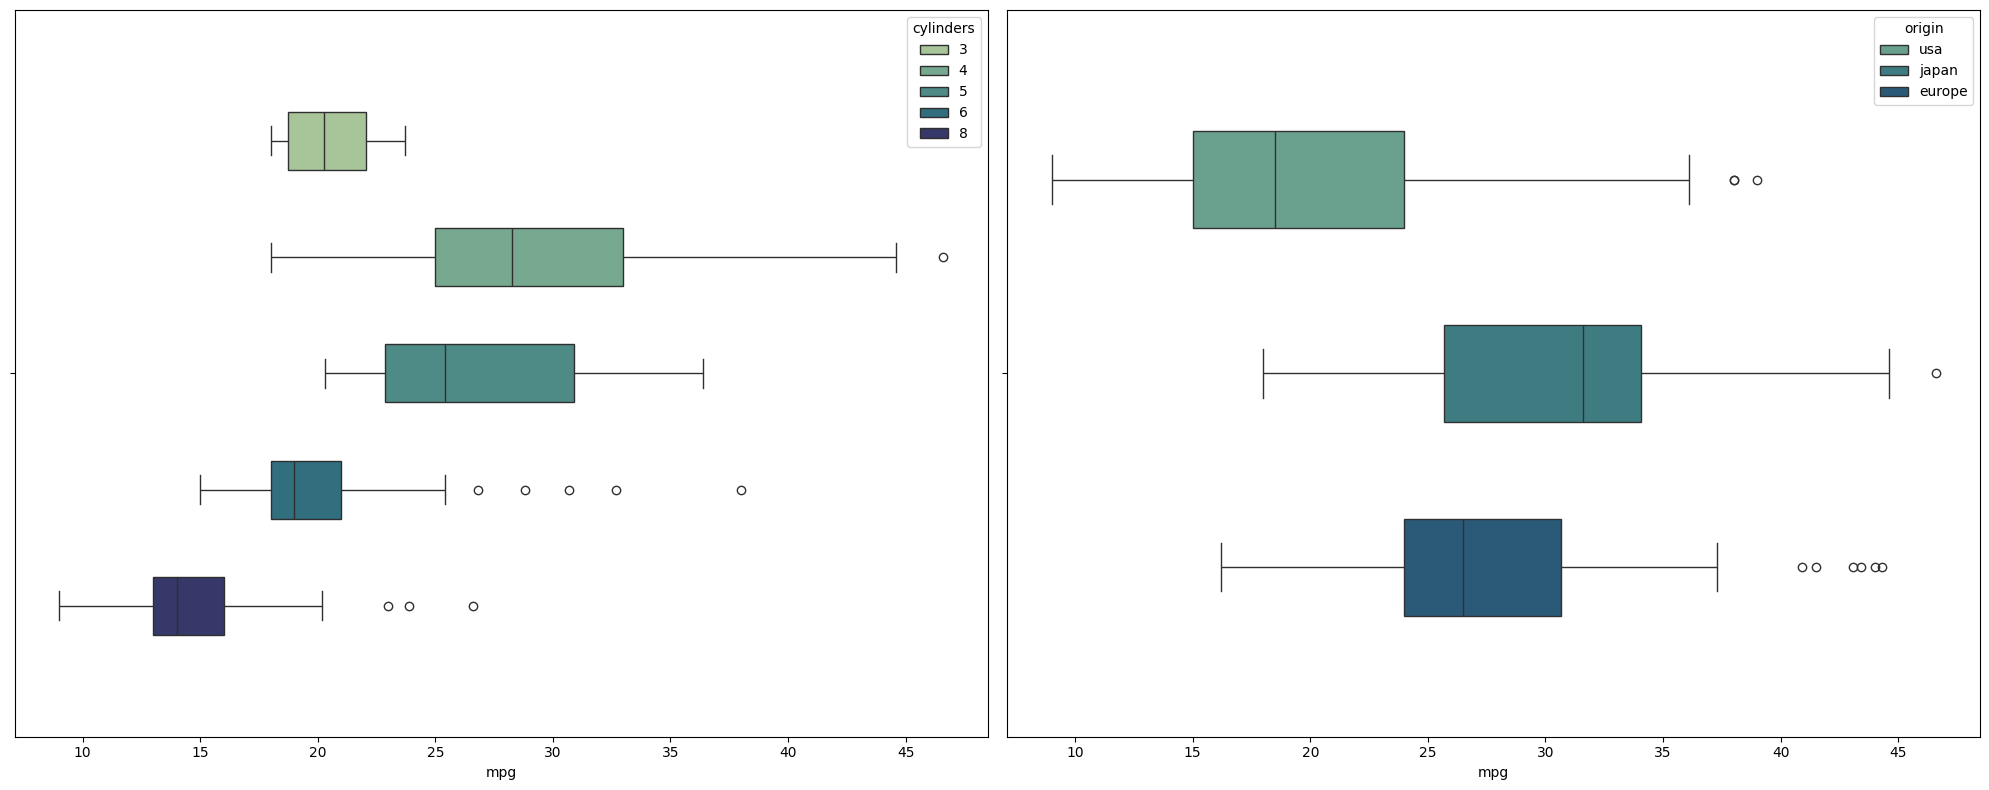

In [13]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
sns.boxplot(x="mpg", hue="cylinders", data=df, palette="crest", gap=0.5)

plt.subplot(1, 2, 2)
sns.boxplot(x="mpg",  hue="origin", data=df, palette="crest", gap=0.5)
plt.tight_layout()

### Bivariate & Multivaritate Analysis

<Axes: >

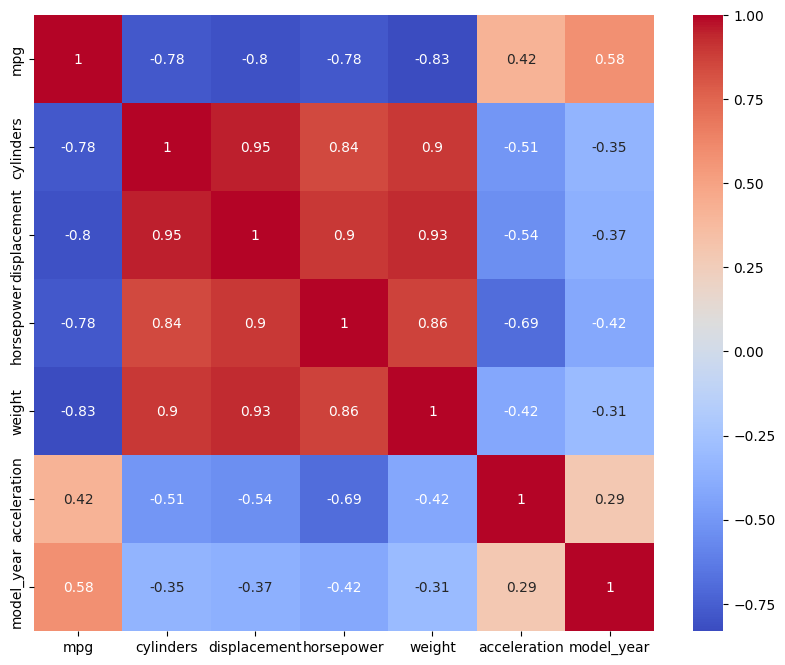

In [14]:
# Analyzing features correlation
"""
Using correlation matrix, we can quickly identify the relationships between different columns.
Correlation values range from -1 to 1:
- (-ve) 1 indicates a perfect negative correlation
- 0 indicates no correlation
- (+ve) 1 indicates a perfect positive correlation
"""

correlation_matrix = df.corr(numeric_only=True)

# Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

<Axes: xlabel='weight', ylabel='mpg'>

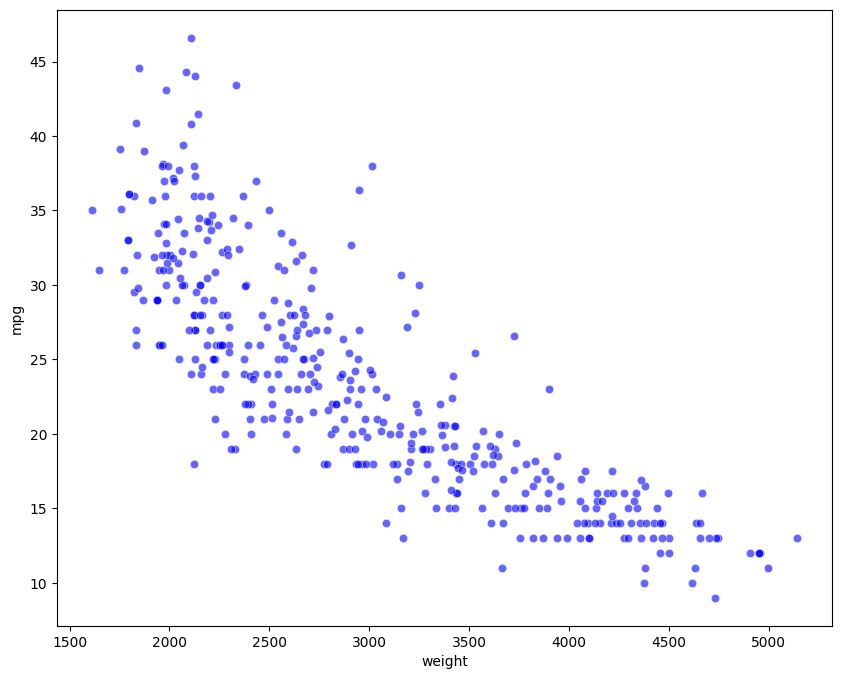

In [15]:
# Visualizing the relationship between two variables
"""
In correlation matrix, we can identify whether two variables are correlated.
But we dont see how (the trend/pattern) they are correlated.
Here, we will visualize the relationship between two variables using scatter plots.
"""

plt.figure(figsize=(10, 8))
sns.scatterplot(x="weight", y="mpg", data=df, color= "blue", alpha=0.6)

<Axes: xlabel='acceleration', ylabel='mpg'>

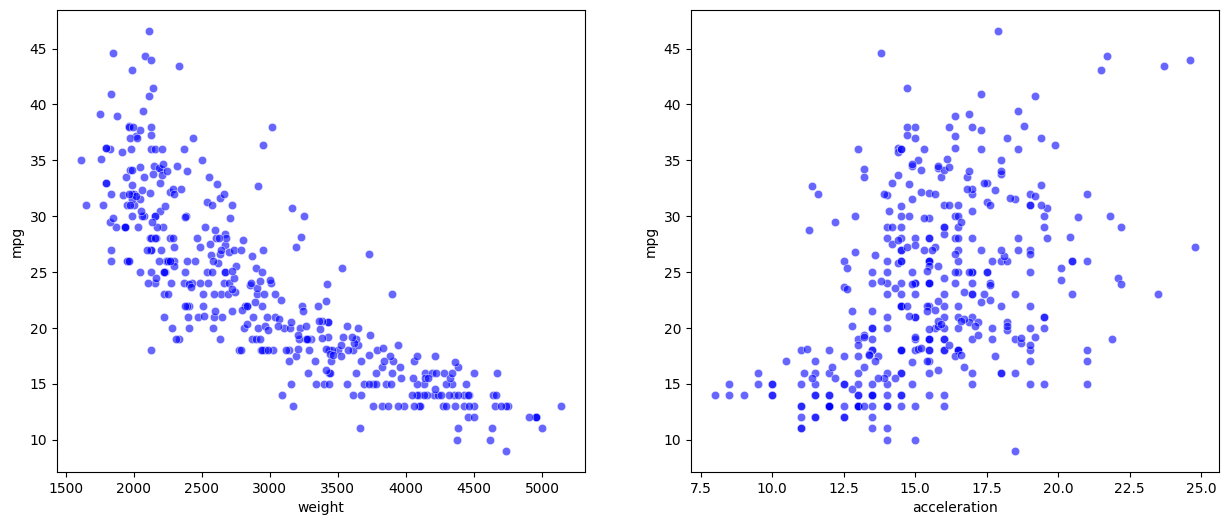

In [ ]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x="weight", y="mpg", data=df, color= "blue", alpha=0.6)

plt.subplot(1, 2, 2)
sns.scatterplot(x="acceleration", y="mpg", data=df, color= "blue", alpha=0.6)

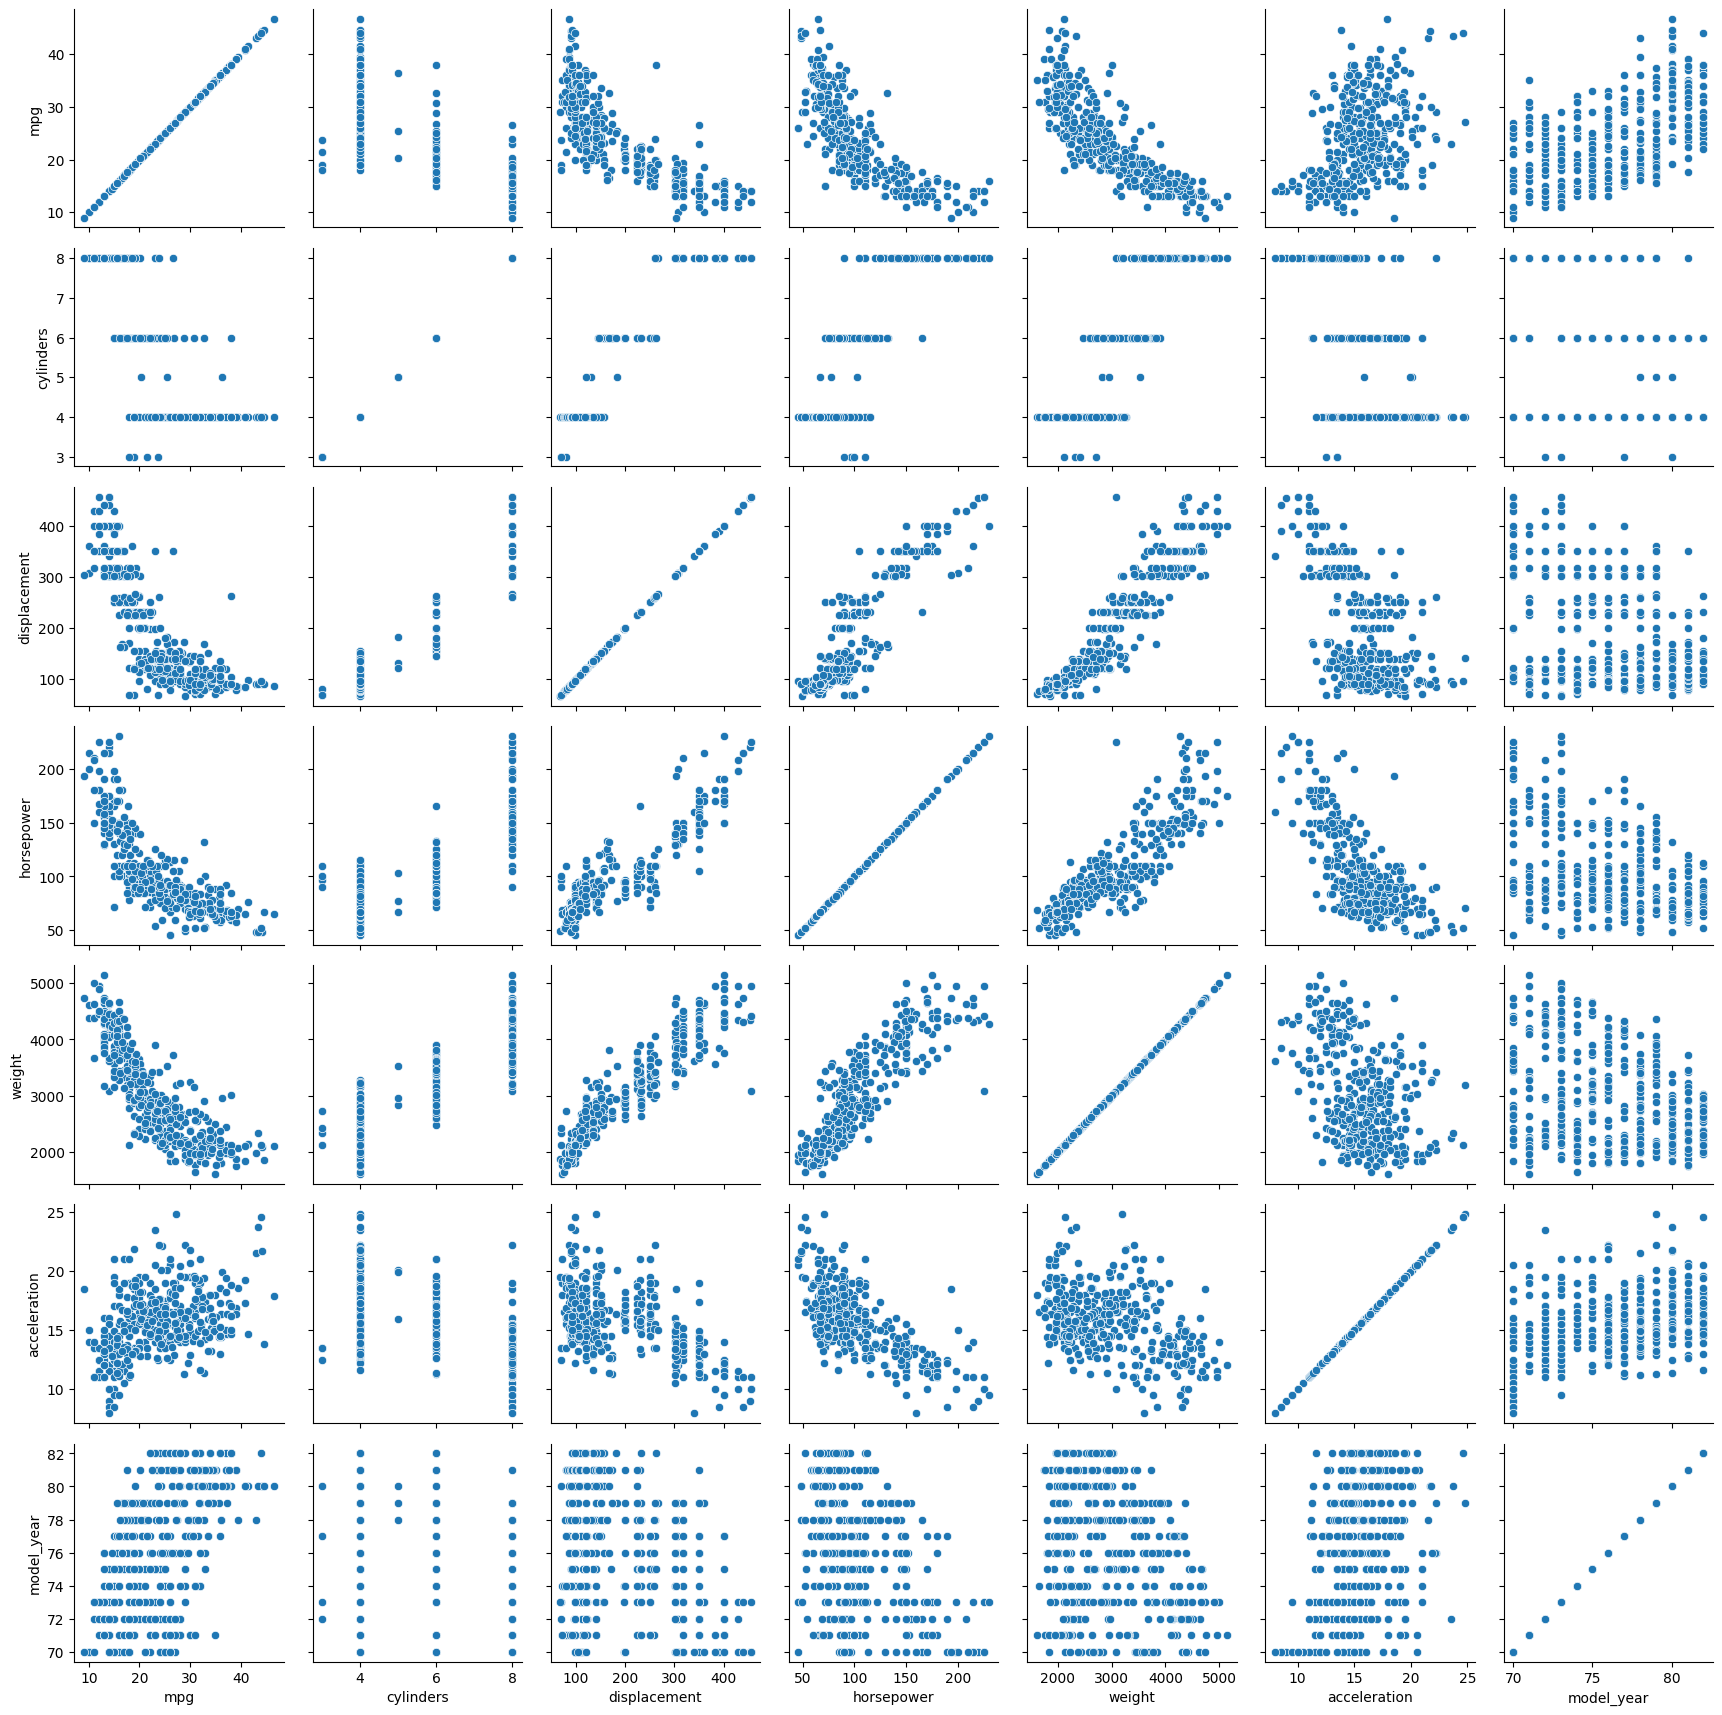

In [17]:
"""
Seaborn provides a convenient way to visualize the relationship between multiple variables using pair plots.
Pair plots allow us to see the pairwise relationships in a dataset.
"""
sns.PairGrid(df).map(sns.scatterplot)

# <--- Using pair grid to visualize selected variables --->
# sns.PairGrid(df, vars=["mpg", "weight", "horsepower","model_year"]).map(sns.scatterplot)

<Axes: xlabel='weight', ylabel='mpg'>

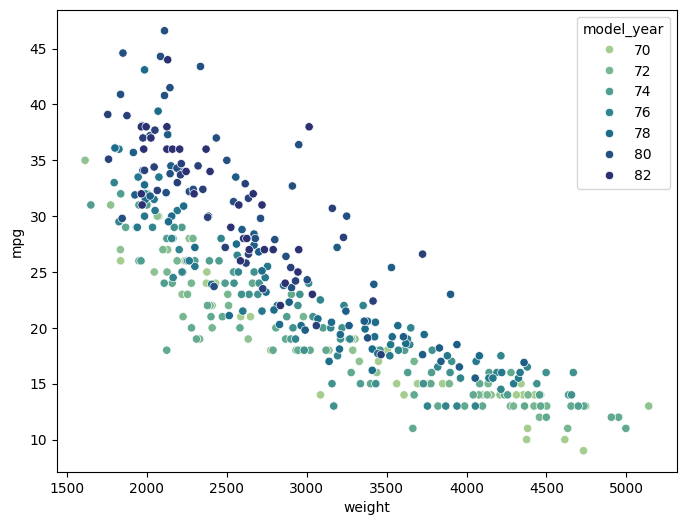

In [18]:
# Visualizing the relationship between three variables with hue
"""
Using seaborn's scatterplot with hue kwargs, we can visualize the relationship between three variables.
"""
plt.figure(figsize=(8, 6))
sns.scatterplot(x="weight", y="mpg", hue="model_year", data=df, palette="crest")

# Feature Engineering

### Data Imputation - Handling Missing Values

In [ ]:
# Drop rows with NaN values
"""
Dropping rows with NaN values is a quick and easy way to clean the dataset.
However, this approach will result in loss of data.
Unless the dataset is very large and abundant and missing values are few.
"""
# <--- Uncomment the line below to drop rows with NaN values --->
# df.dropna()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,is_bivariate_outlier_mpg_weight,is_elliptic_outlier_mpg_weight,is_outlier_mpg_per_weight
0,18.0,8,307.0,130.0,3504.0,12.0,70,usa,chevrolet chevelle malibu,False,False,False
1,15.0,8,350.0,165.0,3693.0,11.5,70,usa,buick skylark 320,False,False,False
2,18.0,8,318.0,150.0,3436.0,11.0,70,usa,plymouth satellite,False,False,False
3,16.0,8,304.0,150.0,3433.0,12.0,70,usa,amc rebel sst,False,False,False
4,17.0,8,302.0,140.0,3449.0,10.5,70,usa,ford torino,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,usa,ford mustang gl,False,False,False
394,44.0,4,97.0,52.0,2130.0,24.6,82,europe,vw pickup,True,True,True
395,32.0,4,135.0,84.0,2295.0,11.6,82,usa,dodge rampage,False,False,False
396,28.0,4,120.0,79.0,2625.0,18.6,82,usa,ford ranger,False,False,False


In [ ]:
# Data Imputation
"""
A better approach to handle missing values is to impute them.
Imputation is the process of replacing missing values with a specific value.
As a quick start, We can use the mean, median, or mode of the column to fill in the missing values
"""

# <--- Filling missing values with mean --->
df["horsepower"] = df["horsepower"].fillna(df["horsepower"].mean())

# <--- Filling missing values with median --->
# df["horsepower"] = df["horsepower"].fillna(df["horsepower"].median())

# <--- Filling missing values with mode --->
# df["horsepower"] = df["horsepower"].fillna(df["horsepower"].mode()[0])

# <-- Filling missing values with a specific value or 0 --->
# df["horsepower"] = df["horsepower"].fillna(0)

### Removing Outliers

In [ ]:
# Removing outliers from weight and mpg column
"""
Removing outliers are important to ensure that the analysis is not skewed by extreme values.
Outliers has great impact in resulting underperfoming models.
We will use the Interquartile Range (IQR) method to identify and remove outliers
At this stage, we are only flagging the outliers. Not removing them yet.
"""

# This function will create a new column in the DataFrame indicating whether a value is an outlier or not
def remove_outlier(col):
    # Calculate the first and third quartiles (Q1 and Q3) and the interquartile range (IQR)
    Q1_weight = df[col].quantile(0.25)
    Q3_weight = df[col].quantile(0.75)
    IQR_weight = Q3_weight - Q1_weight

    # Define outlier bounds using 1.5 * IQR
    lower_bound_weight = Q1_weight - 1.5 * IQR_weight
    upper_bound_weight = Q3_weight + 1.5 * IQR_weight

    df[f"isOutlier_{col}"] = (df[col] < lower_bound_weight) | (df[col] > upper_bound_weight)


# Flagging outliers from the specified columns
remove_outlier("weight") # Flagging outliers from weight column
remove_outlier("horsepower") # Flagging outliers from horsepower column
remove_outlier("mpg") # Flagging outliers from mpg column

"""
Inpsect your dataset after removing outliers.
You can use the isOutlier_<column_name> columns to filter out the outliers.
The isOutlier_<column_name> columns will contain boolean values indicating whether a value is an outlier or not.
You can use these columns to filter out the outliers from the dataset.
"""

df


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,isOutlier_weight,isOutlier_horsepower,isOutlier_mpg
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,False,False,False
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,False,False,False
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,False,False,False
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,False,False,False
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,False,False,False
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,False,False,True
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,False,False,False
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,False,False,False


In [ ]:
# Removing the outliers from the dataset

# <-- This is an alternative way to remove outliers using boolean indexing -->
# df = df[
#     (df["isOutlier_weight"] == False) | 
#     (df["isOutlier_horsepower"] == False) |
#     (df["isOutlier_mpg"] == False)
# ]

df = df[ 
    ( not df["isOutlier_weight"]) | 
    ( not df["isOutlier_horsepower"]) | 
    ( not df["isOutlier_mpg"]) 
    ]

df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,isOutlier_weight,isOutlier_horsepower,isOutlier_mpg
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,False,False,False
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,False,False,False
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,False,False,False
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,False,False,False
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,False,False,False
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,False,False,True
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,False,False,False
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,False,False,False


### Data Normalization & Standardization

In [22]:
# Standardizing the dataset
from sklearn.preprocessing import StandardScaler
"""
Standardization is the process of scaling and aligning the features 
so that they all have a mean of 0 and a standard deviation of 1.
"""

df["std_weight"] = StandardScaler().fit_transform(df[["weight"]])
df["std_acceleration"] = StandardScaler().fit_transform(df[["acceleration"]])
df["std_horsepower"] = StandardScaler().fit_transform(df[["horsepower"]])
df["std_mpg"] = StandardScaler().fit_transform(df[["mpg"]])
df["std_displacement"] = StandardScaler().fit_transform(df[["displacement"]])

df[["std_weight", "std_acceleration", "std_horsepower", "std_mpg", "std_displacement"]].head()


,std_weight,std_acceleration,std_horsepower,std_mpg,std_displacement
0,0.630870,-1.295498,0.664133,-0.706439,1.090604
1,0.854333,-1.477038,1.574594,-1.090751,1.503514
2,0.550470,-1.658577,1.184397,-0.706439,1.196232
3,0.546923,-1.295498,1.184397,-0.962647,1.061796
4,0.565841,-1.840117,0.924265,-0.834543,1.042591


In [ ]:
# Normalizing the dataset
from sklearn.preprocessing import MinMaxScaler
"""Normalization is the process of scaling the features to a range of [0, 1].
This is useful when the features have different scales and we want to bring them to a common scale.
"""

df["norm_weight"] = MinMaxScaler().fit_transform(df[["weight"]])
df["norm_acceleration"] = MinMaxScaler().fit_transform(df[["acceleration"]])
df["norm_horsepower"] = MinMaxScaler().fit_transform(df[["horsepower"]])
df["norm_mpg"] = MinMaxScaler().fit_transform(df[["mpg"]])
df["norm_displacement"] = MinMaxScaler().fit_transform(df[["displacement"]])

df[["norm_weight", "norm_acceleration", "norm_horsepower", "norm_mpg", "norm_displacement"]].head()

,norm_weight,norm_acceleration,norm_horsepower,norm_mpg,norm_displacement
0,0.536150,0.238095,0.456522,0.239362,0.617571
1,0.589736,0.208333,0.646739,0.159574,0.728682
2,0.516870,0.178571,0.565217,0.239362,0.645995
3,0.516019,0.238095,0.565217,0.186170,0.609819
4,0.520556,0.148810,0.510870,0.212766,0.604651


### Data Encoding

In [ ]:
# Encoding categorical variables
"""
Encoding categorical variables is the process of converting categorical variables into numerical values.
This is necessary because machine learning algorithms can only work with numerical values.
We will use one-hot encoding to convert the 'origin' column into numerical values.
One-hot encoding creates a new column for each category in the 'origin' column and assigns a 1 or 0 to indicate the presence of that category.
"""

# One-hot encoding the 'origin' column
df = pd.get_dummies(df, columns=["origin"])
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,name,is_bivariate_outlier_mpg_weight,is_elliptic_outlier_mpg_weight,is_outlier_mpg_per_weight,norm_weight,norm_acceleration,norm_horsepower,norm_mpg,norm_displacement,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504.0,12.0,70,chevrolet chevelle malibu,False,False,False,0.630870,-1.295498,0.669196,-0.706439,1.090604,False,False,True
1,15.0,8,350.0,165.0,3693.0,11.5,70,buick skylark 320,False,False,False,0.854333,-1.477038,1.586599,-1.090751,1.503514,False,False,True
2,18.0,8,318.0,150.0,3436.0,11.0,70,plymouth satellite,False,False,False,0.550470,-1.658577,1.193426,-0.706439,1.196232,False,False,True
3,16.0,8,304.0,150.0,3433.0,12.0,70,amc rebel sst,False,False,False,0.546923,-1.295498,1.193426,-0.962647,1.061796,False,False,True
4,17.0,8,302.0,140.0,3449.0,10.5,70,ford torino,False,False,False,0.565841,-1.840117,0.931311,-0.834543,1.042591,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,ford mustang gl,False,False,False,-0.213324,0.011586,-0.484111,0.446497,-0.513026,False,False,True
394,44.0,4,97.0,52.0,2130.0,24.6,82,vw pickup,True,True,True,-0.993671,3.279296,-1.375302,2.624265,-0.925936,True,False,False
395,32.0,4,135.0,84.0,2295.0,11.6,82,dodge rampage,False,False,False,-0.798585,-1.440730,-0.536534,1.087017,-0.561039,False,False,True
396,28.0,4,120.0,79.0,2625.0,18.6,82,ford ranger,False,False,False,-0.408411,1.100822,-0.667591,0.574601,-0.705077,False,False,True


### Data Binning

<Axes: xlabel='bin_cylinders', ylabel='count'>

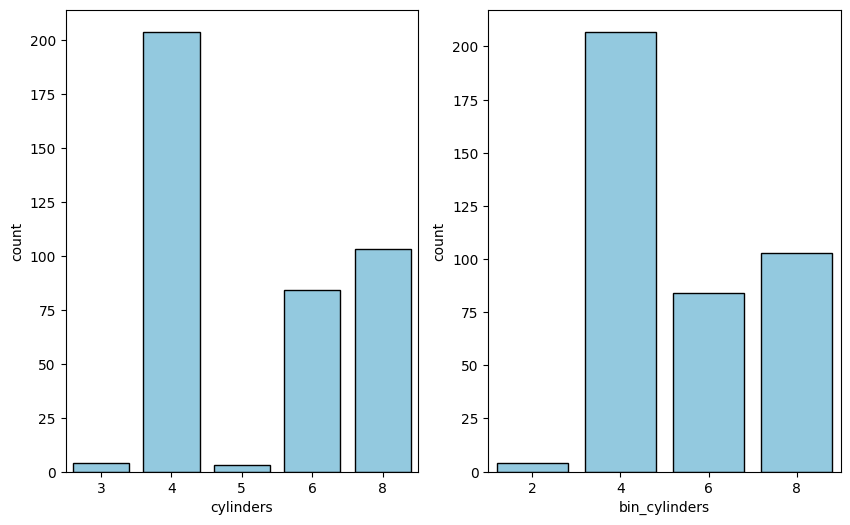

In [26]:
# Binning the data
"""Binning is the process of converting continuous variables into categorical variables by grouping them into bins.
This is useful when we want to reduce the number of unique values in a column and create categories.
In this example, we will bin the 'cylinders' column into bins of 2 cylinders.
We will create a new column 'bin_cylinders' that contains the binned values.
"""

# <-- Function to bin data into specified bin size -->
def bin_data(bin_size, col):
    """
    Binning the data into specified bin size
    """
    return (col // bin_size) * bin_size


df["bin_cylinders"] = bin_data(2, df["cylinders"])

# Visualizing the binned data
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x="cylinders", color="skyblue", order=sorted(df["cylinders"].unique()), edgecolor='black')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x="bin_cylinders", color="skyblue", order=sorted(df["bin_cylinders"].unique()), edgecolor='black')




# Modelling

In [28]:
# Preparing data for modeling
"""
Assigning features and target variable
X will contain the INPUT features (independent variables)
y will contain the OUTPUT target variable (dependent variable)
In this example, we will select 'mpg' as the target variable and 'weight' as the feature.
"""

# Creating a copy of the DataFrame
dat = df.copy()

# Selecting relevant features
dat = dat[["mpg", "weight"]]

# Assigning features and target variable
X = dat["weight"]
y = dat["mpg"]


In [ ]:
# Train-test split
from sklearn.model_selection import train_test_split

"""
Splitting the dataset into training and testing sets.
This is a crucial step in machine learning to evaluate the model's performance on unseen data.
We will use the train_test_split function from sklearn to split the dataset into training and testing sets
The training set will be used to train the model, and the testing set will be used to evaluate the model's performance.
We will use 80:20 ratio for training and testing sets.
"""


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Validating the split to ensure the data is split correctly
print(f"X Train dataset size: {len(x_train)}, Y Train dataset size: {len(y_train)}")
print(f"X Test dataset size: {len(x_test)}, Y Test dataset size: {len(y_test)}")

X Train dataset size: 318, Y Train dataset size: 318
X Test dataset size: 80, Y Test dataset size: 80


<Axes: xlabel='weight', ylabel='mpg'>

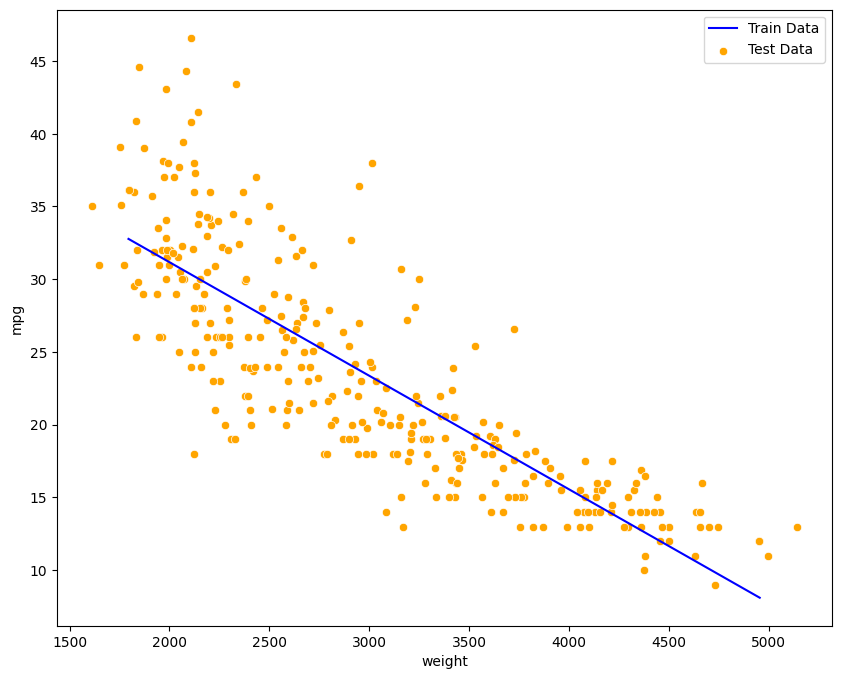

In [32]:
# Fitting the model
from sklearn.linear_model import LinearRegression

"""
Fitting a linear regression model to the training data.
We will use the LinearRegression model from sklearn to fit the model.
The model will learn the relationship between the features and the target variable.
"""

# Instantiating the model
model = LinearRegression()

# Fitting the model to the training data
model.fit(x_train.values.reshape(-1, 1), y_train)

y_train_pred = model.predict(x_train.values.reshape(-1, 1))
y_test_pred = model.predict(x_test.values.reshape(-1, 1))

plt.figure(figsize=(10, 8))
# Model prediction represented by a line
sns.lineplot(x=x_test, y=y_test_pred, color="blue", label="Train Data")

# Actual points represented by a scatterplot
sns.scatterplot(x=x_train, y=y_train, color="orange", label="Test Data")

# Model Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Evaluating the model
"""
Calculating the Mean Squared Error (MSE) and Mean Absolute Error (MAE) for both training and testing sets.
In general, an error is basically the difference between the actual value and the predicted value.
(how far off the model's predictions are from the actual values).
MSE is the average of the squared differences between the actual and predicted values.
MAE is the average of the absolute differences between the actual and predicted values.

The general rule of thumb is - 
The lower the error, the better the model's performance.
But lowest error does not always mean the best model.

What we want to ensure is the model is not overfitting to the training data.
- The error on the training set is significantly lower than the error on the testing set.
- Slightly higher error on the testing set is acceptable, but not too high.

"""

# Calculating MSE
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculating MAE
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f"Train MSE: {mse_train}, Test MSE: {mse_test}")
print(f"Train MAE: {mae_train}, Test MAE: {mae_test}")

Train MSE: 19.781923945400305, Test MSE: 14.894861064636194
Train MAE: 3.359294297635544, Test MAE: 3.1177861992064573


In [ ]:
# Exporting the model
import joblib
"""
Once we are satisfied with the model's performance, we can export the model for future use.
pkl files are used to save Python objects, including machine learning models.
We will use the joblib library to save the model to a file named 'model.pkl'.
"""

joblib.dump(model, "model_lr.pkl")


### Loading the model

In [ ]:
model = joblib.load("model_lr.pkl")


def predict_mpg(weight):
    mpg_pred = model.predict(np.array([[weight]]))
    return mpg_pred[0]

# Example prediction
predicted_mpg = predict_mpg(3000)
predicted_mpg

23.366336311665833

# Extras

# Polynomial Regression

In [34]:
# Preparing data for modeling
import seaborn as sns
import matplotlib.pyplot as plt

"""
In this example, we will attempt to fit a polynomial regression model to the data.
Polynomial regression is a type of regression where the fitted line is no longer a straight line.
We will use the 'weight' column as the feature and 'mpg' as the target
"""

dat = df.copy()
dat = dat[["mpg", "weight"]]

# Selecting features and target variable
X = dat["weight"]
y = dat["mpg"]


In [35]:
# Train-test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X Train dataset size: {len(x_train)}, Y Train dataset size: {len(y_train)}")
print(f"X Test dataset size: {len(x_test)}, Y Test dataset size: {len(y_test)}")

X Train dataset size: 318, Y Train dataset size: 318
X Test dataset size: 80, Y Test dataset size: 80


<Axes: xlabel='weight', ylabel='mpg'>

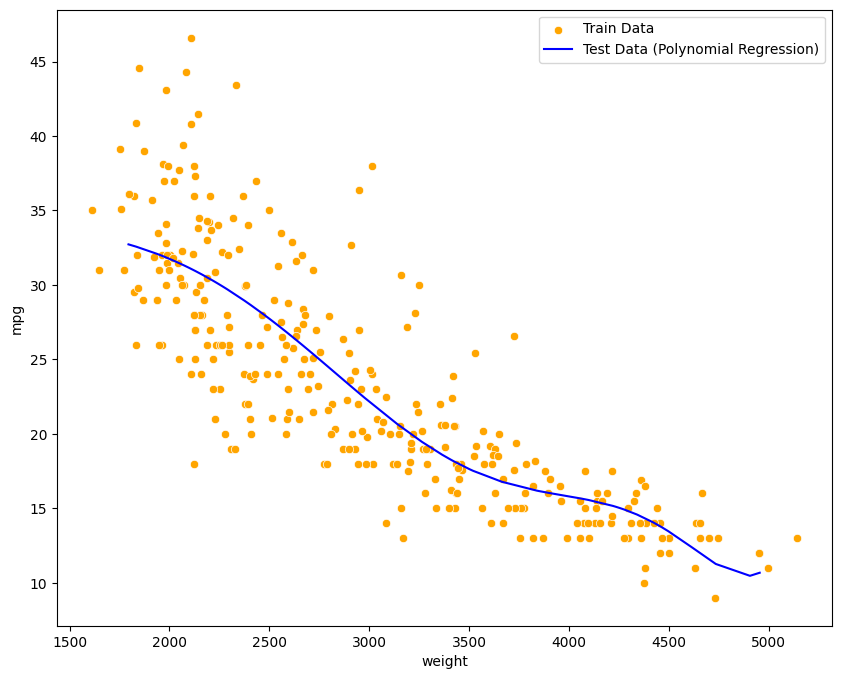

In [45]:
# fit polynomial regression model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# < -- You can change the degree of the polynomial here (any number larger than 1) -->
# 1 is essentially the same as linear regression
polynomial_order = 10
poly = PolynomialFeatures(degree=polynomial_order)
X_poly = poly.fit_transform(x_train.values.reshape(-1, 1))


poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)


y_poly_test_pred = poly_model.predict(poly.transform(x_test.values.reshape(-1, 1))).flatten()


plt.figure(figsize=(10, 8))
sns.scatterplot(x=x_train, y=y_train, color="orange", label="Train Data")
sns.lineplot(x=x_test, y=y_poly_test_pred, color="blue", label="Test Data (Polynomial Regression)")

In [ ]:
# Evaluating the polynomial regression model
from sklearn.metrics import mean_squared_error

mse_poly_train = mean_squared_error(y_train, poly_model.predict(X_poly))
mse_poly_test = mean_squared_error(y_test, y_poly_test_pred)

print(f"Polynomial Train MSE: {mse_poly_train}, Polynomial Test MSE: {mse_poly_test}")

Polynomial Train MSE: 18.463040428340204, Polynomial Test MSE: 13.150522130755494


### PyCaret

In [48]:
from pycaret.regression import RegressionExperiment
"""
PyCaret is an open-source, low-code machine learning library in Python.
It automates the machine learning workflow and provides a simple interface to train and evaluate models.
Usually we use PyCaret to quickly prototype and test different models.
This allows us to quickly compare the performance of different models and select the best one.
"""
s = RegressionExperiment()
s.setup(dat, target = 'mpg')



,Description,Value
0,Session id,8528
1,Target,mpg
2,Target type,Regression
3,Original data shape,"(398, 2)"
4,Transformed data shape,"(398, 2)"
5,Transformed train set shape,"(278, 2)"
6,Transformed test set shape,"(120, 2)"
7,Numeric features,1
8,Preprocess,True
9,Imputation type,simple


In [47]:
best = s.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,3.2522,18.7401,4.3022,0.6819,0.1625,0.1382,34.8820
ada,AdaBoost Regressor,3.2850,19.2413,4.3552,0.6757,0.1642,0.1401,0.0160
lasso,Lasso Regression,3.3653,19.6398,4.4113,0.6686,0.1755,0.1479,0.0130
en,Elastic Net,3.3654,19.6398,4.4113,0.6686,0.1755,0.1479,0.0100
lr,Linear Regression,3.3655,19.6398,4.4113,0.6686,0.1755,0.1479,2.3910
llar,Lasso Least Angle Regression,3.3653,19.6398,4.4113,0.6686,0.1755,0.1479,0.0110
ridge,Ridge Regression,3.3655,19.6398,4.4113,0.6686,0.1755,0.1479,0.0090
omp,Orthogonal Matching Pursuit,3.3655,19.6398,4.4113,0.6686,0.1755,0.1479,0.0100
lar,Least Angle Regression,3.3655,19.6398,4.4113,0.6686,0.1755,0.1479,0.0110
br,Bayesian Ridge,3.3643,19.6403,4.4113,0.6686,0.1753,0.1479,0.0150
